# Multiple aliases

A signal $x(t)$ is sampled at time-points $t[n]= nT_s$, $n= 0, 1, 2, \ldots$, where $T_s$ is the sample interval and $f_s = 1/T_s$ is the sample rate. The resulting signal after sampling is $x[n] = x(n T_s)$
\begin{align}
  x(t) &= \cos(2 \pi f_0 t + \phi) &
  x[n] &=  \cos(2 \pi f_0 n T_s) = \cos(\hat\omega_0 n + \phi)  
\end{align}
The normalised frequency $\hat\omega_0$ is defined as $\hat\omega_0 = 2 \pi f_0 T_s = 2 \pi \frac{f_0}{f_s}$, it represernts the change in phase between two sample points.

The sample ponts $x[n]$ will be the same for all normalised frequencies $\hat\omega$ fulfilling
\begin{align}
  \hat\omega &= \hat\omega_0 + 2 \pi n  & &\text{ or } & \hat\omega &=-\hat\omega_0 + 2n \pi & n &= 0, \pm1, \pm2, \pm3, \ldots
\end{align}
When this is converted to linear frequencies, we get that all frequencies $f_a$ will give the same values in the sample points if 
\begin{align}
  f_a &= f_0 + n f_s  & & \text{ or } & f_a &= -f_0 + n f_s 
\end{align}
The frequency components a real-valued signal have conjugate symmetry, i.e, the spectrum consist of a positive and a negative frequency component with identical amplitudes and opposite phases. This means we only need to consider one of the equations for $f_a$, 
\begin{align}
  f_a &= f_0 + n f_s \quad ,& n &= 0, \pm1, \pm2, \pm3, \ldots  \quad .
\end{align}
The real-valued signal will in addition also contain $-f_a$.


The phenomenon is illustrated in the interactive widget below. The frequency $f_0$, sample rate $f_s$, and phase $\phi$ can be set. The resulting signal $x(t)$ will be drawn (orange curve) and the samples will be marked (blue dots). Note that the positions of the sample points depend on the sample rate only.

When the alias number $n$ is changed, the sine-wave corresponding to this frequency will be shown in the same graph. According to the calculations above, these curves will pass through the same sample points as the original signal, although the curves are different outsid the sample points. Note that the alias number can take both positive and negative values, where $n=0$ represents the original signal.

After the signal has been sampled, the sample points are all the information we have. Hence, after the signal has been sampled, there is no way to find out which of the alias frequencies $f_a$ corresponds to the original frequency $f_0$.

In [15]:
"""Illustrate aliasing in the time domain."""

# Load external modules
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors


# Define class doing all calculations and plotting
class MultipleAliasSignal():
    """Demonstation of multiple aliasing frequencies.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, f=0.2, phase=0, fs=1):
        """Initialise signal."""
        self.f = f                          # Original frequency
        self.phase = 0.2                    # Phase [radians]
        self.fs = fs                        # Sample rate
        self.m = 0                          # Alias frequencies
        self.n_t = 1000                     # Number of point in time vectors
        self.t_max = 2/self.f               # Length of time axis
        self.ax = self.initialise_graphs()
        self.color = self.initialise_colors()

    def fa(self):
        """Find positive alias of positive frequency."""
        return (self.f + self.m * self.fs)

    def ti(self):
        """Original time vector."""
        return np.arange(0, self.t_max, 1/(300*self.f))

    def ts(self):
        """Get sampled time vector, including entire time vector."""
        return np.arange(0, self.t_max+0.5/self.fs, 1/self.fs)

    def original(self):
        """Original signal."""
        return np.cos(2 * pi * self.f * self.ti() + self.phase)

    def sampled(self):
        """Calculate sampled signal."""
        return np.cos(2*pi * self.f * self.ts() + self.phase)

    def alias(self):
        """Reconstructed signal."""
        return np.cos(2 * pi * self.fa() * self.ti() + self.phase)

    def initialise_colors(self):
        """Create consistens set of colors for the plots."""
        color = {}
        color["original"] = mcolors.TABLEAU_COLORS['tab:orange']
        color["sampled"] = mcolors.TABLEAU_COLORS['tab:blue']
        color["alias"] = mcolors.TABLEAU_COLORS['tab:green']

        return color

    def initialise_graphs(self):
        """Initialise graphs for signals and spectra."""
        plt.close("all")
        plt.rc('font', size=12)
        fig = plt.figure(figsize=[12, 6], clear=True)
        ax = fig.add_subplot(1, 1, 1)
        ax.set(xlim=(0, 2/self.f),
               ylim=(-1.1, 1.1),
               xlabel="Time [s]")

        return ax

    def plot(self):
        """Plot all signals and spectra."""
        # Clear old lines
        for art in list(self.ax.lines):
            art.remove()
        for art in list(self.ax.collections):
            art.remove()

        # Plot time traces
        self.ax.stem(self.ts(), self.sampled(),
                     linefmt=self.color["sampled"])
        self.ax.plot(self.ti(), self.original(),
                     linestyle="-",
                     color=self.color["original"],
                     label=f"f = {self.f:.2f} Hz")
        if self.m != 0:
            self.ax.plot(self.ti(), self.alias(),
                         linestyle="-",
                         color=self.color["alias"],
                         label=f"f = {abs(self.fa()):.2f} Hz")

        self.ax.legend(loc="upper right")

        return 0


GridBox(children=(FloatSlider(value=0.0, description='Phase [deg]', layout=Layout(width='90%'), max=180.0, min…

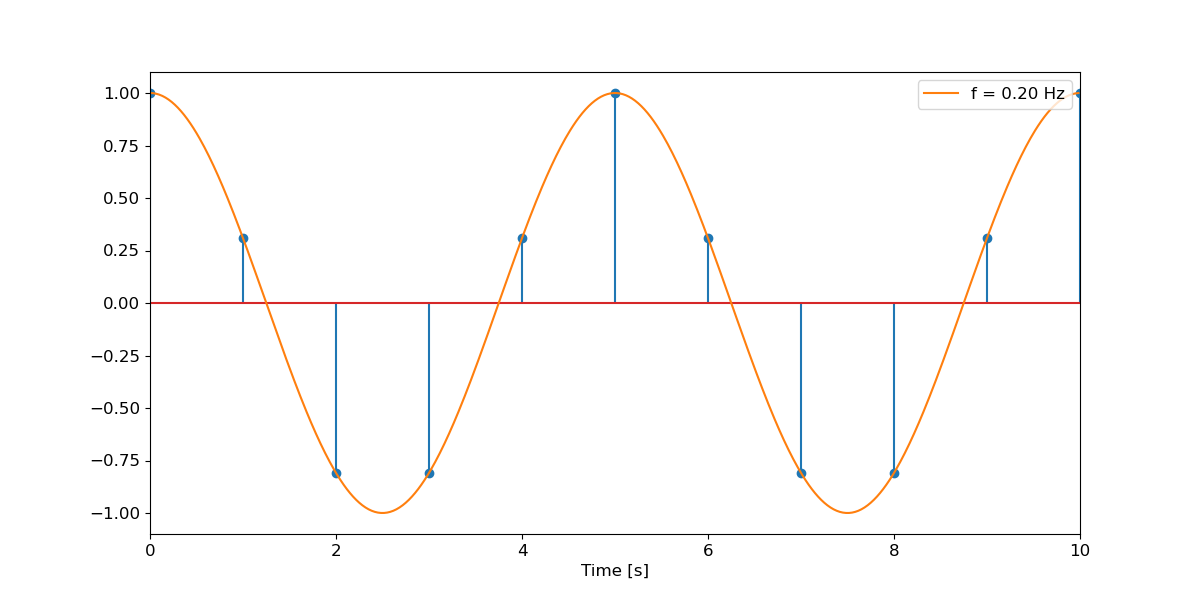

In [17]:
# Code for intereactive operation

# Allow interactive Matplotlib figures
%matplotlib ipympl

# Load external modules
import numpy as np

# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_demo(frequency=0.2, phase_deg=0, sample_rate=1, m=0):
    """Set values and call plotting function."""
    x.f = frequency
    x.fs = sample_rate
    x.phase = np.radians(phase_deg)
    x.m = m
    x.plot()
    return

# Define signal from class definition
x = MultipleAliasSignal()

# Create and display widgets
frequency_widget = widgets.FloatSlider(value=0.2, min=0.02, max=2.0, step=0.01, description='Frequency [Hz]', readout_format='.2f', layout=widgets.Layout(width='90%'))
phase_widget = widgets.FloatSlider(value=0, min=-180, max=180, step=5, description='Phase [deg]',  readout_format='.0f', layout=widgets.Layout(width='90%'))
sample_rate_widget = widgets.FloatText(value=1.0, min=0.2, max=2, step=0.1, description='Sample rate [1/s]', readout_format='.1f', layout=widgets.Layout(width='30%'))
alias_widget = widgets.IntText(value=0, min=-5, max=5, description='Alias number', layout=widgets.Layout(width='30%'))

items = [phase_widget, sample_rate_widget, frequency_widget, alias_widget  ]
widget_grid = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(2, 50%)"))
display(widget_grid)

# Run widgets
w = widgets.interactive(run_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget, m=alias_widget)